In [1]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import cv2
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2


/home/gaobiaoli/miniconda3/envs/openmmlab/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


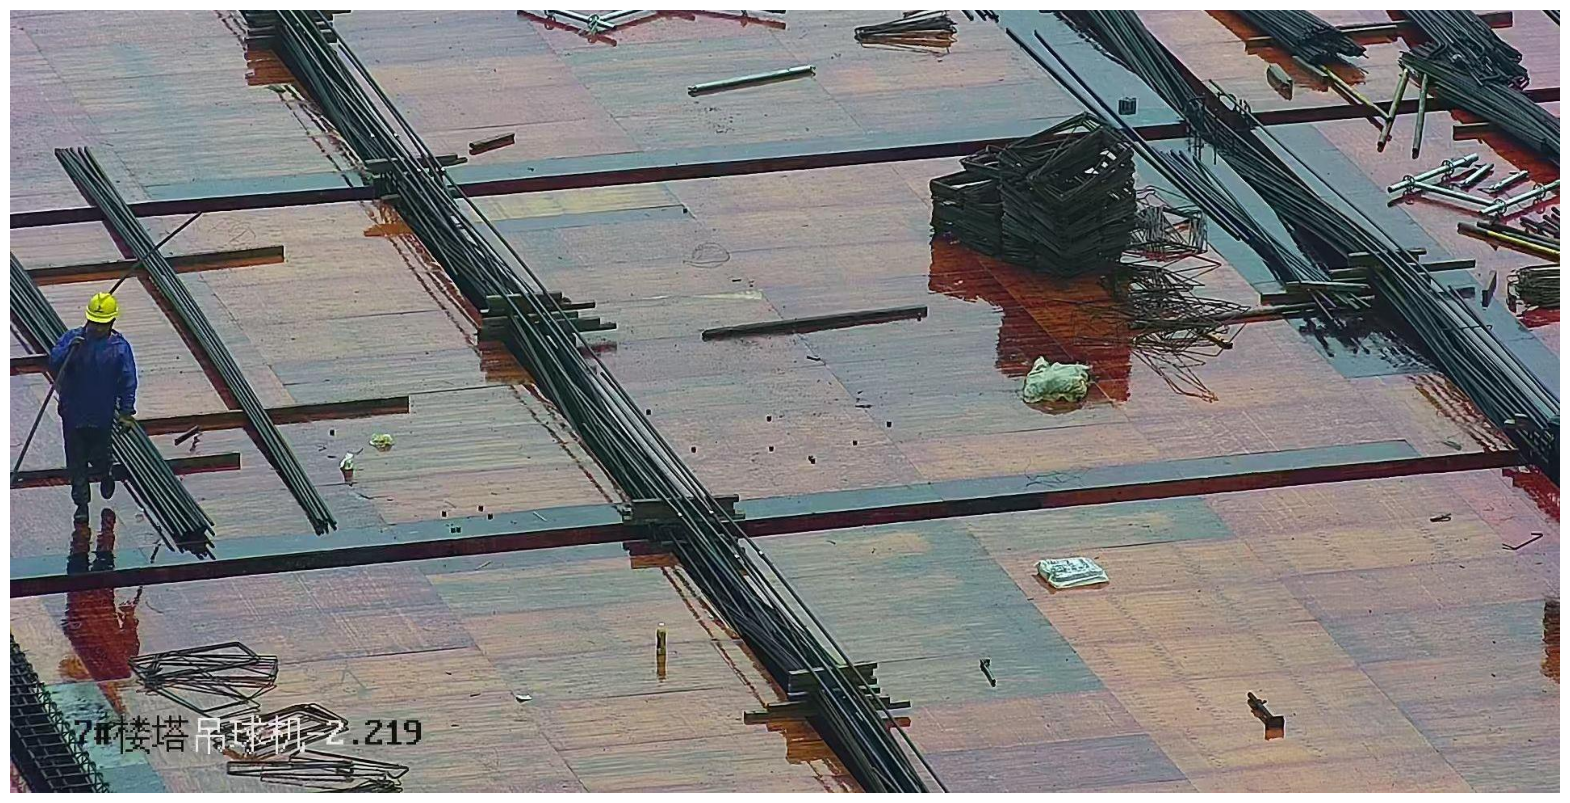

In [2]:
image = cv2.imread('demo.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

74


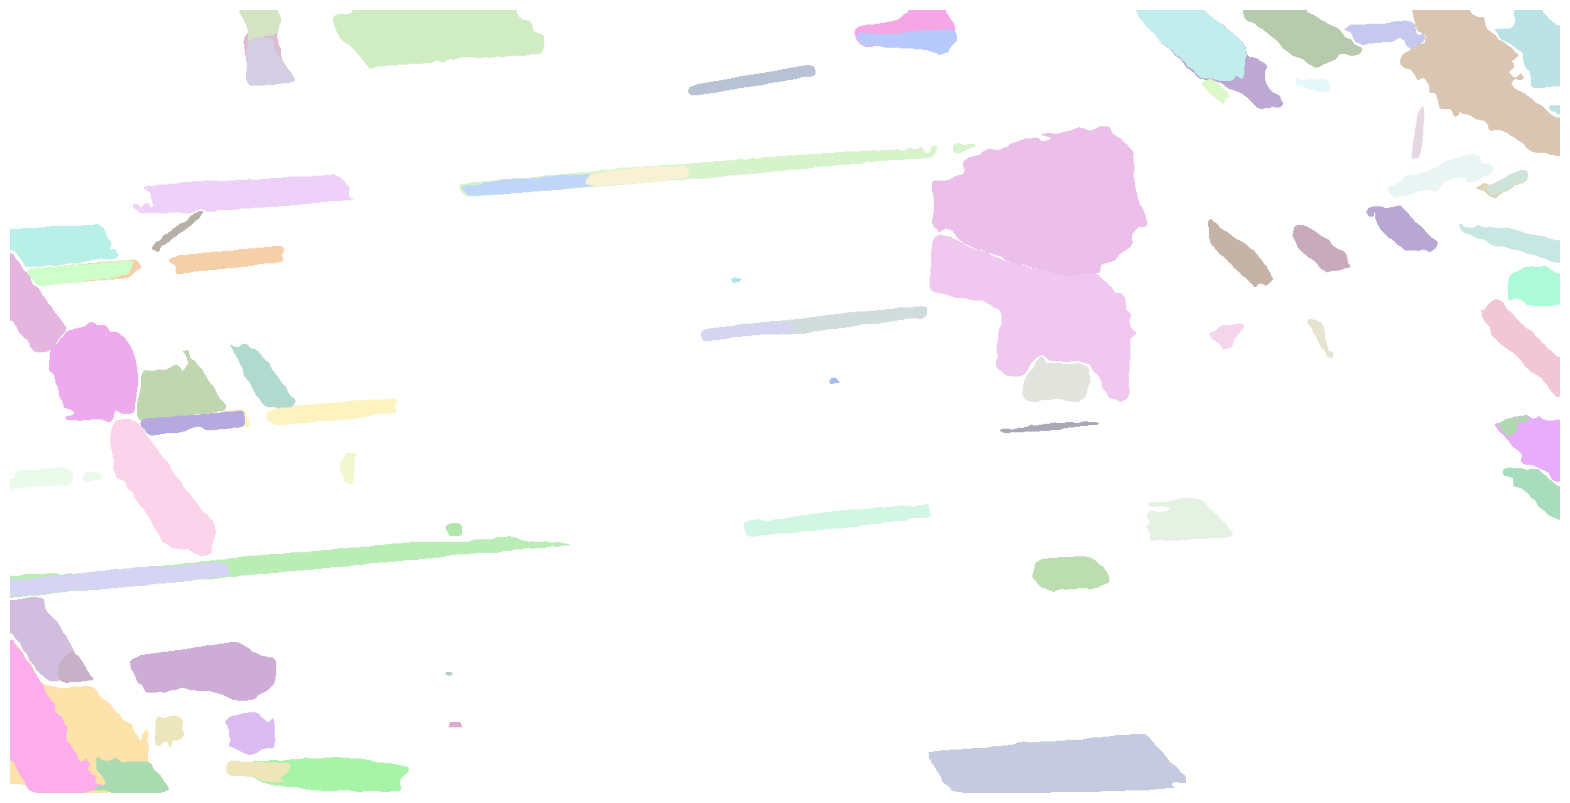

In [3]:
device='cuda'
sam = sam_model_registry['vit_b'](checkpoint="/CV/gaobiaoli/project/weights/sam_vit_b_01ec64.pth").to(device)
# sam = sam_model_registry['vit_l'](checkpoint="/CV/gaobiaoli/project/weights/sam_vit_l_0b3195.pth").to(device)
# mask_generator = SamAutomaticMaskGenerator(sam,points_per_side=128)
mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=16,
    points_per_batch=64,
    pred_iou_thresh=0.2,
    stability_score_thresh=0.8,
    stability_score_offset=2,
    crop_nms_thresh=0.5,
    min_mask_region_area=100,  # Requires open-cv to run post-processing
)
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    plt.figure(figsize=(20,20))
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    plt.imshow(img)
    plt.axis('off')
    plt.show()
masks = mask_generator.generate(image)
# plt.imshow(image)
print(len(masks))
show_anns(masks)



In [ ]:
masks[0]['point_coords']

[[1140.0, 30.3125]]

: 